# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(mouse_metadata,study_results, on='Mouse ID')

# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_count = len(mouse_data.groupby('Mouse ID').count())
print(f'The number of mice is: ', mouse_count)

The number of mice is:  249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_data[mouse_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicates = duplicates['Mouse ID'].unique()
print(f'The duplicate mice have the following ID(s): ',duplicates)

The duplicate mice have the following ID(s):  ['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = mouse_data.loc[mouse_data['Mouse ID'] == 'g989']
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_data[mouse_data['Mouse ID'] != 'g989']
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_count = len(clean_data.groupby('Mouse ID').nunique())
print(f'The number of mice is: ', clean_count)

The number of mice is:  248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median = clean_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
variance = clean_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
std_dev = clean_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
std_error = clean_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.

summary = pd.DataFrame ({'Mean' : mean,
                        'Median' : median,
                        'Variance' : variance,
                        'Std. Deviation' : std_dev,
                        'SEM' : std_error})
summary

/var/folders/5y/9rq_82r563n11lrlx7py2qn0qs72x9/T/ipykernel_81364/2233821244.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = clean_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
/var/folders/5y/9rq_82r563n11lrlx7py2qn0qs72x9/T/ipykernel_81364/2233821244.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median = clean_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
/var/folders/5y/9rq_82r563n11lrlx7py2qn0qs72x9/T/ipykernel_81364/2233821244.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only wi

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

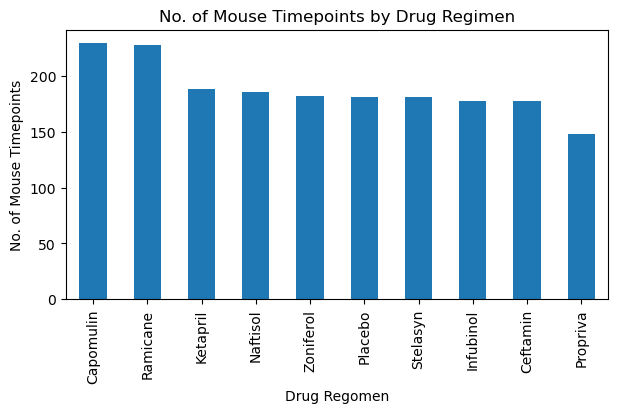

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

counts = clean_data['Drug Regimen'].value_counts()
pandas_bar_chart = counts.plot(kind="bar", figsize=[7,3.5])

#Label Chart Title, Axes
plt.xlabel('Drug Regomen')
plt.ylabel('No. of Mouse Timepoints')
plt.title('No. of Mouse Timepoints by Drug Regimen')

#Create Bar Plot
plt.show()


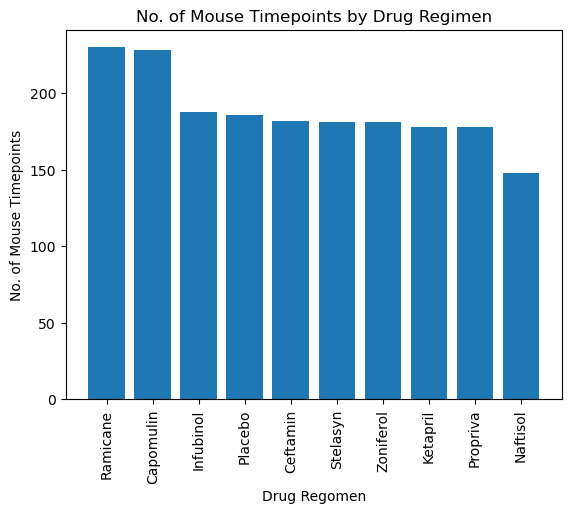

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug = clean_data['Drug Regimen'].unique()
counts2 = clean_data['Drug Regimen'].value_counts()


#Define X- and Y-axes
x_axis = drug
y_axis = counts2

#Label Chart Title, Axes
plt.xlabel('Drug Regomen')
plt.xticks(rotation='vertical')
plt.ylabel('No. of Mouse Timepoints')
plt.title('No. of Mouse Timepoints by Drug Regimen')

#Create a PyPlot Bar Chart
plt.bar(x_axis, y_axis)
plt.show()


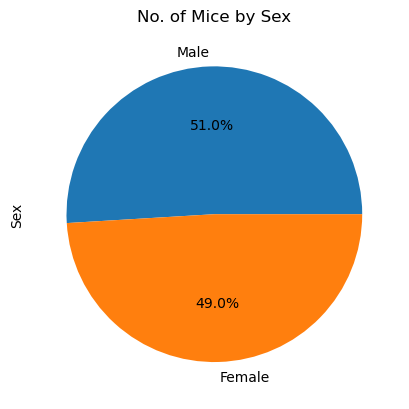

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_counts = clean_data['Sex'].value_counts()
pandas_pie_chart = pie_counts.plot(kind="pie", autopct='%1.1f%%')

#Label Chart Title, Axes
plt.ylabel('Sex')
plt.title('No. of Mice by Sex')

#Create Bar Plot
plt.show()

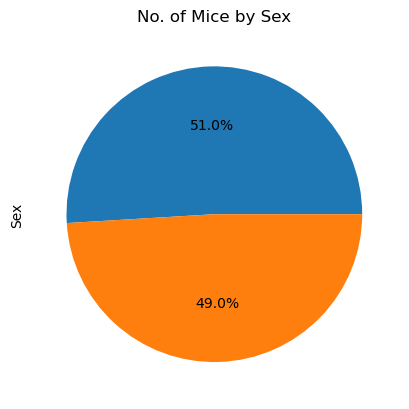

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_counts2 = clean_data['Sex'].value_counts()

#Define Y-axis
y_axis = pie_counts2

#Label Chart Title, Axes
plt.ylabel('Sex')
plt.title('No. of Mice by Sex')

#Create a PyPlot Bar Chart
plt.pie(y_axis,autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_vol = clean_data.groupby(['Mouse ID'])['Timepoint'].max()
final_vol = final_vol.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_data = final_vol.merge(clean_data,on=['Mouse ID','Timepoint'],how="left")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    end_tumor_vol = merge_data.loc[merge_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 

    tumor_vol.append(end_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = end_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = end_tumor_vol.loc[(end_tumor_vol < lower_bound) | (end_tumor_vol > upper_bound)]
    print(f"Outliers for {drug} include: {outliers}")

Outliers for Capomulin include: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ramicane include: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol include: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin include: Series([], Name: Tumor Volume (mm3), dtype: float64)


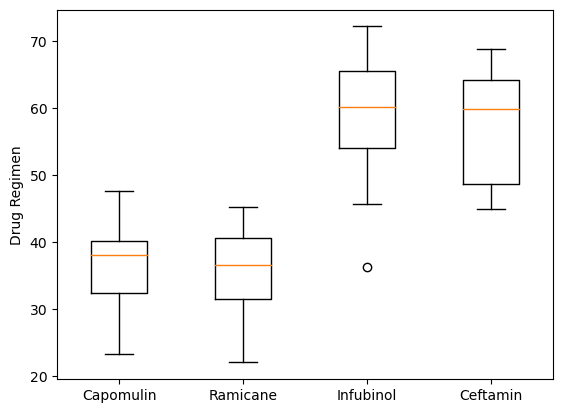

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol
plt.boxplot(tumor_vol,labels=treatment_list)
plt.ylabel('Final Tumor Volume (mm3)')
plt.ylabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

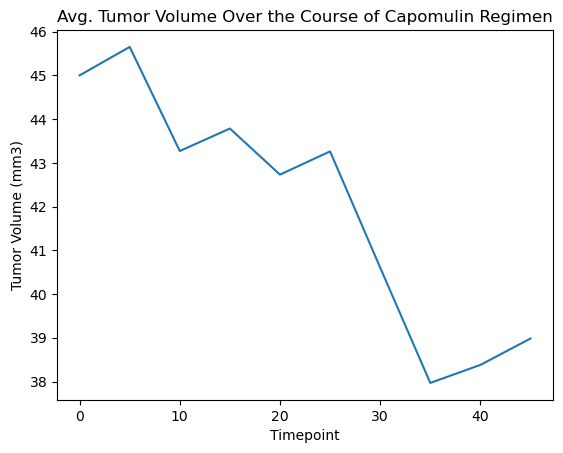

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_data = clean_data.loc[clean_data['Drug Regimen']== 'Capomulin']

# Select a Mouse
mouse = line_data.loc[line_data['Mouse ID']== 'b128']

# Label Plot
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.title('Avg. Tumor Volume Over the Course of Capomulin Regimen')

# Show Plot
plt.plot(mouse['Timepoint'],mouse['Tumor Volume (mm3)'])

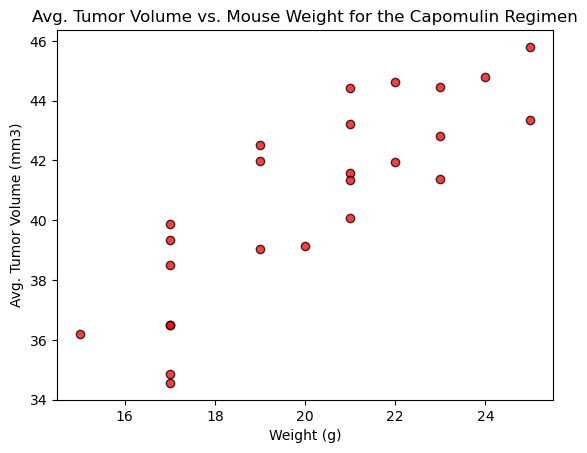

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_data = clean_data.loc[clean_data['Drug Regimen']== 'Capomulin']
avg_vol = line_data.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

# Label Plot
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Avg. Tumor Volume vs. Mouse Weight for the Capomulin Regimen')

# Show Plot
plt.scatter(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'], marker="o", facecolors="red", edgecolors="black", alpha = 0.76)
plt.show()


## Correlation and Regression

The correlation coefficient for weight vs. tumor volume is: 0.84


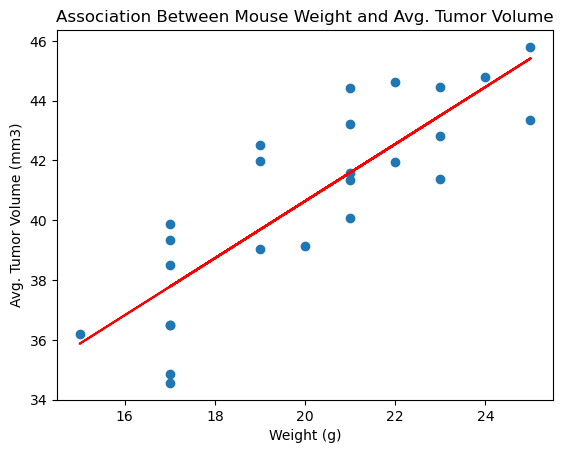

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

corr_coeff = st.pearsonr(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'])
print(f"The correlation coefficient for weight vs. tumor volume is: {round(corr_coeff[0],2)}")

# Input into a Line Regression 
model = st.linregress(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'])

y_values = avg_vol['Weight (g)']*model[0]+model[1]
plt.scatter(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'])
plt.plot(avg_vol['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.title('Association Between Mouse Weight and Avg. Tumor Volume')
plt.show()